# Lorenz Chaos Equations  
The Lorenz equations are a set of differential equations in three dimensional space that explain chaotic convergence on two points in that space. However, they can be used for a range of applications.

### Nonlinear Equations   
The coupled nonlinear equations for the relationship are given as:  

$ \frac{dx}{dt} = \sigma\big( y - x \big)  $
<br>

$ \frac{dy}{dt} = x \big( \rho - z \big) - y $
<br>

$ \frac{dz}{dt} = xy - \beta z$
<br>

In [2]:
#import numerical, graphics, and interactive packages
import numpy as np #numerical processing
import matplotlib.pyplot as plt #plot package
import mpl_toolkits.mplot3d #3D plotting help
import seaborn as sns #makes plots look nice
from ipywidgets import interact #the widgets which will be used for parameter input
from scipy.integrate import odeint
import sympy #symbolic python, to calculate diffEQ solutions

#magic function to plot in Jupyter
%matplotlib inline

#make symbolic python output in LaTeX
sympy.init_printing(use_unicode=True)

In [3]:
#create symbolic variables
x, y, z = sympy.symbols('x y z')
sigma, rho, beta = sympy.symbols('sigma rho beta')

#create symbolic diffEQs
dx_dt = sigma * (y - x)
dy_dt = x * (rho - z) - y
dz_dt = x * y - beta * z

#display equations
dx_dt, dy_dt, dz_dt

In [4]:
#create steady state equations
ss_dx = sympy.Eq(dx_dt, 0)
ss_dy = sympy.Eq(dy_dt, 0)
ss_dz = sympy.Eq(dz_dt, 0)

ss_dx, ss_dy, ss_dz

In [5]:
#find steady state
ss_dx_sol = sympy.solve(ss_dx, x)
ss_dy_sol = sympy.solve(ss_dy, y)
ss_dz_sol = sympy.solve(ss_dz, z)

#display steady state
ss_dx_sol, ss_dy_sol, ss_dz_sol

In [ ]:
#solve the system simultaneously
ss_dict = sympy.solve((sympy.Eq(x, ss_dx_sol), sympy.Eq(y, ss_dy_sol), sympy.Eq(z, ss_dz_sol)), (x,y,z))

ss_dict

In [6]:
#create functions for numerical evaluation
dx_dt_num = sympy.utilities.lambdify([x, y, sigma], dx_dt)
dy_dt_num = sympy.utilities.lambdify([x, y, z, rho], dy_dt)
dz_dt_num = sympy.utilities.lambdify([x, y, z, beta], dz_dt)

def lorenz_rhs(terms, t):
    x, y, z = terms
    
    #numerical derivatives
    dx_dt_dot=dx_dt_num(x, y, sigma)
    dy_dt_dot=dy_dt_num(x, y, z, rho)
    dz_dt_dot=dz_dt_num(x, y, z, beta)
    
    return np.array([dx_dt_dot, dy_dt_dot, dz_dt_dot])

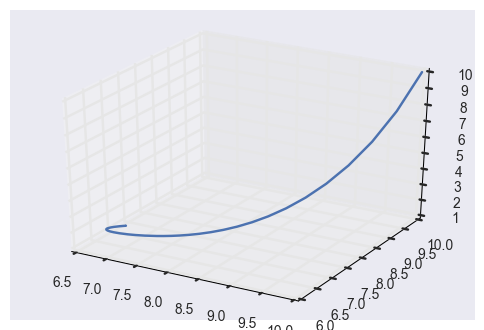

In [15]:
#define parameters
sigma = 10
rho = 8/3
beta = 28

#initial condition
xyz_0 = [10, 10, 10]

#timestep
dt = 0.01
tf = 10000
t = np.linspace(0, tf, tf/dt+1)

x_y_z = odeint(lorenz_rhs, xyz_0, t)

#plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x_y_z[:,0], x_y_z[:,1], x_y_z[:,2])


In [11]:
x_y_z

array([[ 10.        ,  10.        ,  10.        ],
       [  9.96259951,   9.25472863,   8.39366253],
       [  9.86551712,   8.6628716 ,   7.11647062],
       ..., 
       [  6.83130051,   6.83130051,   1.66666667],
       [  6.83130051,   6.83130051,   1.66666667],
       [  6.83130051,   6.83130051,   1.66666667]])